In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
complete_data_df = ride_df.merge(city_df,on="city")

complete_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [8]:
city_group = complete_data_df.groupby(["city","driver_count","type"])

city_complete = pd.DataFrame()
city_complete["Total Rides (per City)"] = city_group["ride_id"].count()
city_complete["Average Fare ($)"] = city_group["fare"].mean()
city_complete["Total Fare ($)"] = city_group["fare"].sum()
city_complete = city_complete.reset_index()


city_complete.head()

,city,driver_count,type,Total Rides (per City),Average Fare ($),Total Fare ($)
0,Amandaburgh,12,Urban,18,24.641667,443.55
1,Barajasview,26,Urban,22,25.332273,557.31
2,Barronchester,11,Suburban,16,36.422500,582.76
3,Bethanyland,22,Suburban,18,32.956111,593.21
4,Bradshawfurt,7,Rural,10,40.064000,400.64



## Bubble Plot of Ride Sharing Data

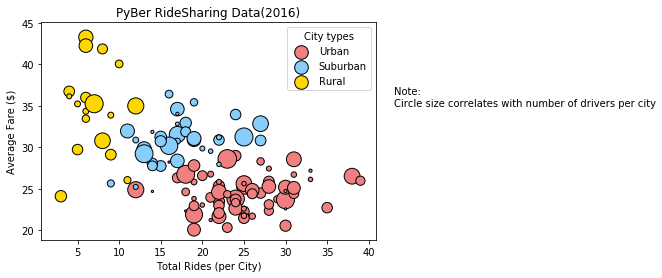

In [9]:
colors = {"Urban":"lightcoral","Suburban":"lightskyblue","Rural":"gold"}

scatter_plot_df = city_complete[["Total Rides (per City)","Average Fare ($)","type"]]

urban_set = city_complete[city_complete.type == "Urban"]
suburb_set = city_complete[city_complete.type == "Suburban"]
rural_set = city_complete[city_complete.type == "Rural"]
handles = []
ax = urban_set.plot(kind="scatter",
                   x="Total Rides (per City)",y="Average Fare ($)",
                   edgecolor='k',
                   s=city_complete.driver_count*5,
                   color="lightcoral",
                   label="Urban")
suburb_set.plot(kind="scatter",
               x="Total Rides (per City)",y="Average Fare ($)",
               edgecolor='k',
               s=city_complete.driver_count*5,
               color="lightskyblue",
               label="Suburban",
               ax=ax)
rural_set.plot(kind="scatter",x="Total Rides (per City)",y="Average Fare ($)",
               edgecolor='k',
               s=city_complete.driver_count*5,
               color="gold",
               label="Rural",
               ax=ax)

plt.legend(title="City types")

plt.xlabel("Total Rides (per City)")

plt.ylabel("Average Fare ($)")

plt.title("PyBer RideSharing Data(2016)")

plt.text(43,35,"Note:\nCircle size correlates with number of drivers per city")
plt.show()


In [10]:
city_type_group = city_complete.groupby("type")

city_type_complete = pd.DataFrame()

city_type_complete["Total Rides"] = city_type_group["Total Rides (per City)"].sum()
city_type_complete["Total Drivers"] = city_type_group["driver_count"].sum()
city_type_complete["Total Fare ($)"] = city_type_group["Total Fare ($)"].sum()
city_type_complete.reset_index(inplace=True)
city_type_complete.head()

,type,Total Rides,Total Drivers,Total Fare ($)
0,Rural,125,78,4327.93
1,Suburban,625,490,19356.33
2,Urban,1625,2405,39854.38


## Total Fares by City Type

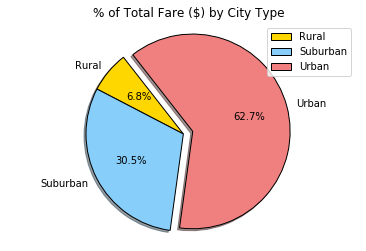

In [11]:
explode_dict = {"Urban":0.1,"Suburban":0,"Rural":0}
city_type_complete["explode"] = [explode_dict[x] for x in city_type_complete["type"]]
city_type_complete["colors"] = [colors[x] for x in city_type_complete["type"]]

city_type_complete.plot(kind="pie",y="Total Fare ($)", autopct='%1.1f%%',
  startangle=128, shadow=True,explode=city_type_complete.explode,
                       colors=city_type_complete.colors,labels=city_type_complete.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'k'})

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Fare ($) by City Type')

plt.show()

## Total Rides by City Type

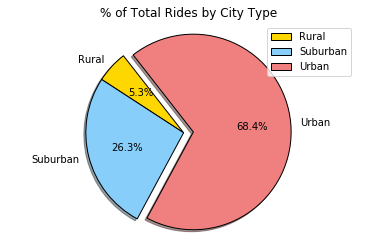

In [12]:
explode_dict = {"Urban":0.1,"Suburban":0,"Rural":0}
city_type_complete["explode"] = [explode_dict[x] for x in city_type_complete["type"]]
city_type_complete["colors"] = [colors[x] for x in city_type_complete["type"]]

city_type_complete.plot(kind="pie",y="Total Rides", autopct='%1.1f%%',
 startangle=128, shadow=True,explode=city_type_complete.explode,
                       colors=city_type_complete.colors,labels=city_type_complete.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'k'})

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Rides by City Type')

plt.show()


## Total Drivers by City Type

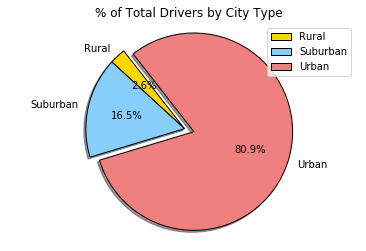

In [13]:
explode_dict = {"Urban":0.1,"Suburban":0,"Rural":0}
city_type_complete.plot(kind="pie",y="Total Drivers", autopct='%1.1f%%',
 startangle=128, shadow=True,explode=city_type_complete.explode,
                       colors=city_type_complete.colors,labels=city_type_complete.type,
                      wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'k'})

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Drivers by City Type')

plt.show()

# Written description of three observable trends based on the data
1.  Rural areas have the highest average fare because they travel farther than more densely populated areas.
2.  Urban areas have the shrtest distance but the most volume of rides
3.  Urban areas have the most amount of drivers but have fewer rides per driver due to the more sparsely populated areas they work in.
